# Main Problem
$$\left\{ \begin{array}{l}
 - y''(x) = (3x + {x^2}){e^x},\,\,\,\,\,\,\,\,\,0 < x < 1,\\
y(0) = 0,\\
y(1) = 0,
\end{array} \right.$$

# Exact Solution
$$y(x)=x(1-x)\exp(x)$$

In [ ]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [ ]:
# Assuming one input, hidden, and output layer
def neural_network(params, x):

    # Find the weights (including and biases) for the hidden and output layer.
    # Assume that params is a list of parameters for each layer.
    # The biases are the first element for each array in params,
    # and the weights are the remaning elements in each array in params.

    w_hidden = params[0]
    w_output = params[1]

    # Assumes input x being an one-dimensional array
    num_values = np.size(x)
    x = x.reshape(-1, num_values)

    # Assume that the input layer does nothing to the input x
    x_input = x

    ## Hidden layer:

    # Add a row of ones to include bias
    x_input = np.concatenate((np.ones((1,num_values)), x_input ), axis = 0)

    z_hidden = np.matmul(w_hidden, x_input)
    x_hidden = sigmoid(z_hidden)

    ## Output layer:

    # Include bias:
    x_hidden = np.concatenate((np.ones((1,num_values)), x_hidden ), axis = 0)

    z_output = np.matmul(w_output, x_hidden)
    x_output = z_output

    return x_output

In [ ]:
# The trial solution using the deep neural network:
def g_trial(x,params):
    return  x*(x-1)*neural_network(params,x)

In [ ]:
# The right side of the ODE:
def g(x, g_trial):
    return (3*x+x**2)*np.exp(x)

In [ ]:
# The cost function:
def cost_function(P, x):

    # Evaluate the trial function with the current parameters P
    g_t = g_trial(x,P)

    # Find the derivative w.r.t x of the neural network
    #d_net_out = elementwise_grad(neural_network,1)(P,x)

    # Find the derivative w.r.t x of the trial function
    #d_g_t  = elementwise_grad(g_trial,0)(x,P)
    dd_g_t = elementwise_grad(elementwise_grad(g_trial,0))(x,P)


    # The right side of the ODE
    func = g(x, g_t)

    err_sqr = (-dd_g_t - func)**2
    cost_sum = np.sum(err_sqr)

    return cost_sum / np.size(err_sqr)

In [ ]:
# Solve the exponential decay ODE using neural network with one input, hidden, and output layer
def solve_ode_neural_network(x, num_neurons_hidden, num_iter, lmb):
    ## Set up initial weights and biases

    # For the hidden layer
    p0 = npr.randn(num_neurons_hidden, 2 )

    # For the output layer
    p1 = npr.randn(1, num_neurons_hidden + 1 ) # +1 since bias is included

    P = [p0, p1]

    print('Initial cost: %g'%cost_function(P, x))

    ## Start finding the optimal weights using gradient descent

    # Find the Python function that represents the gradient of the cost function
    # w.r.t the 0-th input argument -- that is the weights and biases in the hidden and output layer
    cost_function_grad = grad(cost_function,0)

    # Let the update be done num_iter times
    for i in range(num_iter):
        # Evaluate the gradient at the current weights and biases in P.
        # The cost_grad consist now of two arrays;
        # one for the gradient w.r.t P_hidden and
        # one for the gradient w.r.t P_output
        cost_grad =  cost_function_grad(P, x)

        P[0] = P[0] - lmb * cost_grad[0]
        P[1] = P[1] - lmb * cost_grad[1]
        print('Final cost: %g'%cost_function(P, x))

    return P

In [ ]:
def g_analytic(x):
    return x*(1-x)*np.exp(x)

In [ ]:
# Solve the given problem
if __name__ == '__main__':
    # Set seed such that the weight are initialized
    # with same weights and biases for every run.
    npr.seed(15)

    ## Decide the vales of arguments to the function to solve
    N = 10
    x = np.linspace(0, 1, N)

    ## Set up the initial parameters
    num_hidden_neurons = 10
    num_iter = 10000
    lmb = 0.001

    # Use the network
    P = solve_ode_neural_network(x, num_hidden_neurons, num_iter, lmb)

    # Print the deviation from the trial solution and true solution
    res = g_trial(x,P)
    res_analytical = g_analytic(x)

    print('Max absolute difference: %g'%np.max(np.abs(res - res_analytical)))

Initial cost: 36.0407
Final cost: 35.0561
Final cost: 34.1175
Final cost: 33.2221
Final cost: 32.3674
Final cost: 31.551
Final cost: 30.7707
Final cost: 30.0242
Final cost: 29.3098
Final cost: 28.6253
Final cost: 27.9693
Final cost: 27.34
Final cost: 26.7359
Final cost: 26.1555
Final cost: 25.5976
Final cost: 25.0609
Final cost: 24.5442
Final cost: 24.0464
Final cost: 23.5664
Final cost: 23.1034
Final cost: 22.6564
Final cost: 22.2245
Final cost: 21.8069
Final cost: 21.403
Final cost: 21.0119
Final cost: 20.6331
Final cost: 20.266
Final cost: 19.9098
Final cost: 19.5642
Final cost: 19.2286
Final cost: 18.9025
Final cost: 18.5854
Final cost: 18.277
Final cost: 17.9769
Final cost: 17.6846
Final cost: 17.3998
Final cost: 17.1222
Final cost: 16.8516
Final cost: 16.5875
Final cost: 16.3297
Final cost: 16.078
Final cost: 15.8321
Final cost: 15.5917
Final cost: 15.3568
Final cost: 15.127
Final cost: 14.9021
Final cost: 14.6821
Final cost: 14.4666
Final cost: 14.2557
Final cost: 14.049
Final c

Final cost: 1.11105
Final cost: 1.11015
Final cost: 1.10925
Final cost: 1.10836
Final cost: 1.10748
Final cost: 1.10662
Final cost: 1.10576
Final cost: 1.10491
Final cost: 1.10407
Final cost: 1.10323
Final cost: 1.10241
Final cost: 1.10159
Final cost: 1.10079
Final cost: 1.09999
Final cost: 1.0992
Final cost: 1.09841
Final cost: 1.09764
Final cost: 1.09687
Final cost: 1.09611
Final cost: 1.09536
Final cost: 1.09461
Final cost: 1.09387
Final cost: 1.09314
Final cost: 1.09242
Final cost: 1.0917
Final cost: 1.09099
Final cost: 1.09029
Final cost: 1.08959
Final cost: 1.0889
Final cost: 1.08821
Final cost: 1.08753
Final cost: 1.08686
Final cost: 1.0862
Final cost: 1.08554
Final cost: 1.08488
Final cost: 1.08423
Final cost: 1.08359
Final cost: 1.08295
Final cost: 1.08232
Final cost: 1.08169
Final cost: 1.08107
Final cost: 1.08046
Final cost: 1.07984
Final cost: 1.07924
Final cost: 1.07864
Final cost: 1.07804
Final cost: 1.07745
Final cost: 1.07686
Final cost: 1.07628
Final cost: 1.07571
Fina

Final cost: 0.956596
Final cost: 0.956333
Final cost: 0.95607
Final cost: 0.955808
Final cost: 0.955545
Final cost: 0.955282
Final cost: 0.95502
Final cost: 0.954757
Final cost: 0.954495
Final cost: 0.954233
Final cost: 0.953971
Final cost: 0.953709
Final cost: 0.953448
Final cost: 0.953186
Final cost: 0.952924
Final cost: 0.952663
Final cost: 0.952402
Final cost: 0.952141
Final cost: 0.951879
Final cost: 0.951619
Final cost: 0.951358
Final cost: 0.951097
Final cost: 0.950836
Final cost: 0.950576
Final cost: 0.950316
Final cost: 0.950055
Final cost: 0.949795
Final cost: 0.949535
Final cost: 0.949275
Final cost: 0.949016
Final cost: 0.948756
Final cost: 0.948496
Final cost: 0.948237
Final cost: 0.947978
Final cost: 0.947718
Final cost: 0.947459
Final cost: 0.9472
Final cost: 0.946941
Final cost: 0.946683
Final cost: 0.946424
Final cost: 0.946165
Final cost: 0.945907
Final cost: 0.945649
Final cost: 0.94539
Final cost: 0.945132
Final cost: 0.944874
Final cost: 0.944616
Final cost: 0.9443

Final cost: 0.860456
Final cost: 0.860227
Final cost: 0.859999
Final cost: 0.859771
Final cost: 0.859543
Final cost: 0.859315
Final cost: 0.859087
Final cost: 0.858859
Final cost: 0.858631
Final cost: 0.858404
Final cost: 0.858176
Final cost: 0.857948
Final cost: 0.857721
Final cost: 0.857493
Final cost: 0.857266
Final cost: 0.857038
Final cost: 0.856811
Final cost: 0.856584
Final cost: 0.856357
Final cost: 0.85613
Final cost: 0.855903
Final cost: 0.855676
Final cost: 0.855449
Final cost: 0.855222
Final cost: 0.854995
Final cost: 0.854768
Final cost: 0.854542
Final cost: 0.854315
Final cost: 0.854089
Final cost: 0.853862
Final cost: 0.853636
Final cost: 0.853409
Final cost: 0.853183
Final cost: 0.852957
Final cost: 0.852731
Final cost: 0.852505
Final cost: 0.852279
Final cost: 0.852053
Final cost: 0.851827
Final cost: 0.851601
Final cost: 0.851375
Final cost: 0.85115
Final cost: 0.850924
Final cost: 0.850698
Final cost: 0.850473
Final cost: 0.850247
Final cost: 0.850022
Final cost: 0.8

Final cost: 0.771258
Final cost: 0.77105
Final cost: 0.770843
Final cost: 0.770635
Final cost: 0.770427
Final cost: 0.77022
Final cost: 0.770012
Final cost: 0.769805
Final cost: 0.769597
Final cost: 0.76939
Final cost: 0.769183
Final cost: 0.768975
Final cost: 0.768768
Final cost: 0.768561
Final cost: 0.768353
Final cost: 0.768146
Final cost: 0.767939
Final cost: 0.767732
Final cost: 0.767525
Final cost: 0.767318
Final cost: 0.767111
Final cost: 0.766904
Final cost: 0.766697
Final cost: 0.76649
Final cost: 0.766283
Final cost: 0.766076
Final cost: 0.76587
Final cost: 0.765663
Final cost: 0.765456
Final cost: 0.765249
Final cost: 0.765043
Final cost: 0.764836
Final cost: 0.76463
Final cost: 0.764423
Final cost: 0.764217
Final cost: 0.76401
Final cost: 0.763804
Final cost: 0.763597
Final cost: 0.763391
Final cost: 0.763185
Final cost: 0.762978
Final cost: 0.762772
Final cost: 0.762566
Final cost: 0.76236
Final cost: 0.762154
Final cost: 0.761947
Final cost: 0.761741
Final cost: 0.761535


Final cost: 0.689089
Final cost: 0.688892
Final cost: 0.688696
Final cost: 0.6885
Final cost: 0.688304
Final cost: 0.688108
Final cost: 0.687912
Final cost: 0.687716
Final cost: 0.68752
Final cost: 0.687324
Final cost: 0.687128
Final cost: 0.686933
Final cost: 0.686737
Final cost: 0.686541
Final cost: 0.686345
Final cost: 0.686149
Final cost: 0.685953
Final cost: 0.685758
Final cost: 0.685562
Final cost: 0.685366
Final cost: 0.68517
Final cost: 0.684975
Final cost: 0.684779
Final cost: 0.684583
Final cost: 0.684388
Final cost: 0.684192
Final cost: 0.683997
Final cost: 0.683801
Final cost: 0.683605
Final cost: 0.68341
Final cost: 0.683214
Final cost: 0.683019
Final cost: 0.682824
Final cost: 0.682628
Final cost: 0.682433
Final cost: 0.682237
Final cost: 0.682042
Final cost: 0.681847
Final cost: 0.681651
Final cost: 0.681456
Final cost: 0.681261
Final cost: 0.681065
Final cost: 0.68087
Final cost: 0.680675
Final cost: 0.68048
Final cost: 0.680285
Final cost: 0.680089
Final cost: 0.679894

Final cost: 0.61196
Final cost: 0.611771
Final cost: 0.611582
Final cost: 0.611393
Final cost: 0.611205
Final cost: 0.611016
Final cost: 0.610827
Final cost: 0.610638
Final cost: 0.610449
Final cost: 0.61026
Final cost: 0.610071
Final cost: 0.609883
Final cost: 0.609694
Final cost: 0.609505
Final cost: 0.609316
Final cost: 0.609128
Final cost: 0.608939
Final cost: 0.60875
Final cost: 0.608561
Final cost: 0.608373
Final cost: 0.608184
Final cost: 0.607995
Final cost: 0.607807
Final cost: 0.607618
Final cost: 0.607429
Final cost: 0.607241
Final cost: 0.607052
Final cost: 0.606864
Final cost: 0.606675
Final cost: 0.606487
Final cost: 0.606298
Final cost: 0.60611
Final cost: 0.605921
Final cost: 0.605733
Final cost: 0.605544
Final cost: 0.605356
Final cost: 0.605167
Final cost: 0.604979
Final cost: 0.604791
Final cost: 0.604602
Final cost: 0.604414
Final cost: 0.604225
Final cost: 0.604037
Final cost: 0.603849
Final cost: 0.603661
Final cost: 0.603472
Final cost: 0.603284
Final cost: 0.603

Final cost: 0.537763
Final cost: 0.53758
Final cost: 0.537397
Final cost: 0.537215
Final cost: 0.537032
Final cost: 0.536849
Final cost: 0.536666
Final cost: 0.536483
Final cost: 0.536301
Final cost: 0.536118
Final cost: 0.535935
Final cost: 0.535752
Final cost: 0.53557
Final cost: 0.535387
Final cost: 0.535204
Final cost: 0.535021
Final cost: 0.534839
Final cost: 0.534656
Final cost: 0.534473
Final cost: 0.534291
Final cost: 0.534108
Final cost: 0.533926
Final cost: 0.533743
Final cost: 0.533561
Final cost: 0.533378
Final cost: 0.533196
Final cost: 0.533013
Final cost: 0.532831
Final cost: 0.532648
Final cost: 0.532466
Final cost: 0.532283
Final cost: 0.532101
Final cost: 0.531918
Final cost: 0.531736
Final cost: 0.531554
Final cost: 0.531371
Final cost: 0.531189
Final cost: 0.531007
Final cost: 0.530824
Final cost: 0.530642
Final cost: 0.53046
Final cost: 0.530277
Final cost: 0.530095
Final cost: 0.529913
Final cost: 0.529731
Final cost: 0.529549
Final cost: 0.529366
Final cost: 0.52

Final cost: 0.464062
Final cost: 0.463887
Final cost: 0.463712
Final cost: 0.463536
Final cost: 0.463361
Final cost: 0.463186
Final cost: 0.463011
Final cost: 0.462835
Final cost: 0.46266
Final cost: 0.462485
Final cost: 0.46231
Final cost: 0.462135
Final cost: 0.46196
Final cost: 0.461785
Final cost: 0.461609
Final cost: 0.461434
Final cost: 0.461259
Final cost: 0.461084
Final cost: 0.46091
Final cost: 0.460735
Final cost: 0.46056
Final cost: 0.460385
Final cost: 0.46021
Final cost: 0.460035
Final cost: 0.45986
Final cost: 0.459685
Final cost: 0.459511
Final cost: 0.459336
Final cost: 0.459161
Final cost: 0.458986
Final cost: 0.458812
Final cost: 0.458637
Final cost: 0.458462
Final cost: 0.458288
Final cost: 0.458113
Final cost: 0.457938
Final cost: 0.457764
Final cost: 0.457589
Final cost: 0.457415
Final cost: 0.45724
Final cost: 0.457066
Final cost: 0.456891
Final cost: 0.456717
Final cost: 0.456543
Final cost: 0.456368
Final cost: 0.456194
Final cost: 0.456019
Final cost: 0.455845


Final cost: 0.39421
Final cost: 0.394045
Final cost: 0.39388
Final cost: 0.393716
Final cost: 0.393551
Final cost: 0.393386
Final cost: 0.393222
Final cost: 0.393057
Final cost: 0.392892
Final cost: 0.392728
Final cost: 0.392563
Final cost: 0.392399
Final cost: 0.392234
Final cost: 0.39207
Final cost: 0.391906
Final cost: 0.391741
Final cost: 0.391577
Final cost: 0.391413
Final cost: 0.391248
Final cost: 0.391084
Final cost: 0.39092
Final cost: 0.390756
Final cost: 0.390592
Final cost: 0.390427
Final cost: 0.390263
Final cost: 0.390099
Final cost: 0.389935
Final cost: 0.389771
Final cost: 0.389607
Final cost: 0.389443
Final cost: 0.389279
Final cost: 0.389116
Final cost: 0.388952
Final cost: 0.388788
Final cost: 0.388624
Final cost: 0.38846
Final cost: 0.388297
Final cost: 0.388133
Final cost: 0.387969
Final cost: 0.387806
Final cost: 0.387642
Final cost: 0.387478
Final cost: 0.387315
Final cost: 0.387151
Final cost: 0.386988
Final cost: 0.386824
Final cost: 0.386661
Final cost: 0.3864

Final cost: 0.331089
Final cost: 0.330938
Final cost: 0.330787
Final cost: 0.330636
Final cost: 0.330486
Final cost: 0.330335
Final cost: 0.330184
Final cost: 0.330033
Final cost: 0.329883
Final cost: 0.329732
Final cost: 0.329581
Final cost: 0.329431
Final cost: 0.32928
Final cost: 0.32913
Final cost: 0.328979
Final cost: 0.328829
Final cost: 0.328678
Final cost: 0.328528
Final cost: 0.328378
Final cost: 0.328227
Final cost: 0.328077
Final cost: 0.327927
Final cost: 0.327777
Final cost: 0.327627
Final cost: 0.327477
Final cost: 0.327327
Final cost: 0.327177
Final cost: 0.327027
Final cost: 0.326877
Final cost: 0.326727
Final cost: 0.326577
Final cost: 0.326427
Final cost: 0.326278
Final cost: 0.326128
Final cost: 0.325978
Final cost: 0.325829
Final cost: 0.325679
Final cost: 0.325529
Final cost: 0.32538
Final cost: 0.32523
Final cost: 0.325081
Final cost: 0.324932
Final cost: 0.324782
Final cost: 0.324633
Final cost: 0.324484
Final cost: 0.324334
Final cost: 0.324185
Final cost: 0.324

Final cost: 0.273752
Final cost: 0.273618
Final cost: 0.273484
Final cost: 0.273351
Final cost: 0.273217
Final cost: 0.273084
Final cost: 0.27295
Final cost: 0.272817
Final cost: 0.272683
Final cost: 0.27255
Final cost: 0.272416
Final cost: 0.272283
Final cost: 0.27215
Final cost: 0.272017
Final cost: 0.271884
Final cost: 0.27175
Final cost: 0.271617
Final cost: 0.271484
Final cost: 0.271351
Final cost: 0.271218
Final cost: 0.271086
Final cost: 0.270953
Final cost: 0.27082
Final cost: 0.270687
Final cost: 0.270555
Final cost: 0.270422
Final cost: 0.270289
Final cost: 0.270157
Final cost: 0.270024
Final cost: 0.269892
Final cost: 0.269759
Final cost: 0.269627
Final cost: 0.269495
Final cost: 0.269362
Final cost: 0.26923
Final cost: 0.269098
Final cost: 0.268966
Final cost: 0.268834
Final cost: 0.268702
Final cost: 0.26857
Final cost: 0.268438
Final cost: 0.268306
Final cost: 0.268174
Final cost: 0.268042
Final cost: 0.26791
Final cost: 0.267779
Final cost: 0.267647
Final cost: 0.267515


Final cost: 0.223148
Final cost: 0.223034
Final cost: 0.22292
Final cost: 0.222807
Final cost: 0.222693
Final cost: 0.222579
Final cost: 0.222465
Final cost: 0.222352
Final cost: 0.222238
Final cost: 0.222124
Final cost: 0.222011
Final cost: 0.221897
Final cost: 0.221784
Final cost: 0.22167
Final cost: 0.221557
Final cost: 0.221444
Final cost: 0.221331
Final cost: 0.221217
Final cost: 0.221104
Final cost: 0.220991
Final cost: 0.220878
Final cost: 0.220765
Final cost: 0.220652
Final cost: 0.220539
Final cost: 0.220427
Final cost: 0.220314
Final cost: 0.220201
Final cost: 0.220088
Final cost: 0.219976
Final cost: 0.219863
Final cost: 0.219751
Final cost: 0.219638
Final cost: 0.219526
Final cost: 0.219413
Final cost: 0.219301
Final cost: 0.219189
Final cost: 0.219076
Final cost: 0.218964
Final cost: 0.218852
Final cost: 0.21874
Final cost: 0.218628
Final cost: 0.218516
Final cost: 0.218404
Final cost: 0.218292
Final cost: 0.21818
Final cost: 0.218069
Final cost: 0.217957
Final cost: 0.217

Final cost: 0.181474
Final cost: 0.181381
Final cost: 0.181287
Final cost: 0.181193
Final cost: 0.181099
Final cost: 0.181006
Final cost: 0.180912
Final cost: 0.180819
Final cost: 0.180725
Final cost: 0.180632
Final cost: 0.180538
Final cost: 0.180445
Final cost: 0.180352
Final cost: 0.180258
Final cost: 0.180165
Final cost: 0.180072
Final cost: 0.179979
Final cost: 0.179886
Final cost: 0.179793
Final cost: 0.1797
Final cost: 0.179607
Final cost: 0.179514
Final cost: 0.179422
Final cost: 0.179329
Final cost: 0.179236
Final cost: 0.179144
Final cost: 0.179051
Final cost: 0.178958
Final cost: 0.178866
Final cost: 0.178774
Final cost: 0.178681
Final cost: 0.178589
Final cost: 0.178497
Final cost: 0.178404
Final cost: 0.178312
Final cost: 0.17822
Final cost: 0.178128
Final cost: 0.178036
Final cost: 0.177944
Final cost: 0.177852
Final cost: 0.17776
Final cost: 0.177668
Final cost: 0.177576
Final cost: 0.177485
Final cost: 0.177393
Final cost: 0.177301
Final cost: 0.17721
Final cost: 0.1771

Final cost: 0.147243
Final cost: 0.147169
Final cost: 0.147094
Final cost: 0.14702
Final cost: 0.146946
Final cost: 0.146872
Final cost: 0.146798
Final cost: 0.146724
Final cost: 0.146651
Final cost: 0.146577
Final cost: 0.146503
Final cost: 0.146429
Final cost: 0.146356
Final cost: 0.146282
Final cost: 0.146208
Final cost: 0.146135
Final cost: 0.146061
Final cost: 0.145988
Final cost: 0.145914
Final cost: 0.145841
Final cost: 0.145768
Final cost: 0.145694
Final cost: 0.145621
Final cost: 0.145548
Final cost: 0.145475
Final cost: 0.145402
Final cost: 0.145329
Final cost: 0.145256
Final cost: 0.145183
Final cost: 0.14511
Final cost: 0.145037
Final cost: 0.144964
Final cost: 0.144891
Final cost: 0.144819
Final cost: 0.144746
Final cost: 0.144673
Final cost: 0.144601
Final cost: 0.144528
Final cost: 0.144456
Final cost: 0.144383
Final cost: 0.144311
Final cost: 0.144238
Final cost: 0.144166
Final cost: 0.144094
Final cost: 0.144022
Final cost: 0.143949
Final cost: 0.143877
Final cost: 0.1

Final cost: 0.121246
Final cost: 0.121189
Final cost: 0.121132
Final cost: 0.121075
Final cost: 0.121018
Final cost: 0.120961
Final cost: 0.120904
Final cost: 0.120847
Final cost: 0.12079
Final cost: 0.120733
Final cost: 0.120677
Final cost: 0.12062
Final cost: 0.120563
Final cost: 0.120506
Final cost: 0.12045
Final cost: 0.120393
Final cost: 0.120337
Final cost: 0.12028
Final cost: 0.120224
Final cost: 0.120167
Final cost: 0.120111
Final cost: 0.120054
Final cost: 0.119998
Final cost: 0.119942
Final cost: 0.119886
Final cost: 0.119829
Final cost: 0.119773
Final cost: 0.119717
Final cost: 0.119661
Final cost: 0.119605
Final cost: 0.119549
Final cost: 0.119493
Final cost: 0.119437
Final cost: 0.119381
Final cost: 0.119325
Final cost: 0.11927
Final cost: 0.119214
Final cost: 0.119158
Final cost: 0.119102
Final cost: 0.119047
Final cost: 0.118991
Final cost: 0.118936
Final cost: 0.11888
Final cost: 0.118825
Final cost: 0.118769
Final cost: 0.118714
Final cost: 0.118658
Final cost: 0.11860

Final cost: 0.10149
Final cost: 0.101447
Final cost: 0.101404
Final cost: 0.101362
Final cost: 0.101319
Final cost: 0.101276
Final cost: 0.101234
Final cost: 0.101191
Final cost: 0.101148
Final cost: 0.101106
Final cost: 0.101063
Final cost: 0.101021
Final cost: 0.100978
Final cost: 0.100936
Final cost: 0.100893
Final cost: 0.100851
Final cost: 0.100809
Final cost: 0.100766
Final cost: 0.100724
Final cost: 0.100682
Final cost: 0.10064
Final cost: 0.100597
Final cost: 0.100555
Final cost: 0.100513
Final cost: 0.100471
Final cost: 0.100429
Final cost: 0.100387
Final cost: 0.100345
Final cost: 0.100303
Final cost: 0.100261
Final cost: 0.100219
Final cost: 0.100177
Final cost: 0.100135
Final cost: 0.100094
Final cost: 0.100052
Final cost: 0.10001
Final cost: 0.0999683
Final cost: 0.0999267
Final cost: 0.099885
Final cost: 0.0998434
Final cost: 0.0998018
Final cost: 0.0997603
Final cost: 0.0997187
Final cost: 0.0996773
Final cost: 0.0996358
Final cost: 0.0995944
Final cost: 0.099553
Final c

Final cost: 0.0874071
Final cost: 0.0873752
Final cost: 0.0873433
Final cost: 0.0873115
Final cost: 0.0872796
Final cost: 0.0872478
Final cost: 0.0872161
Final cost: 0.0871843
Final cost: 0.0871526
Final cost: 0.0871209
Final cost: 0.0870893
Final cost: 0.0870576
Final cost: 0.087026
Final cost: 0.0869944
Final cost: 0.0869628
Final cost: 0.0869313
Final cost: 0.0868998
Final cost: 0.0868683
Final cost: 0.0868368
Final cost: 0.0868054
Final cost: 0.086774
Final cost: 0.0867426
Final cost: 0.0867112
Final cost: 0.0866799
Final cost: 0.0866486
Final cost: 0.0866173
Final cost: 0.086586
Final cost: 0.0865548
Final cost: 0.0865235
Final cost: 0.0864924
Final cost: 0.0864612
Final cost: 0.0864301
Final cost: 0.0863989
Final cost: 0.0863678
Final cost: 0.0863368
Final cost: 0.0863057
Final cost: 0.0862747
Final cost: 0.0862437
Final cost: 0.0862128
Final cost: 0.0861818
Final cost: 0.0861509
Final cost: 0.08612
Final cost: 0.0860891
Final cost: 0.0860583
Final cost: 0.0860275
Final cost: 0.0

Final cost: 0.0769627
Final cost: 0.0769393
Final cost: 0.0769158
Final cost: 0.0768924
Final cost: 0.076869
Final cost: 0.0768457
Final cost: 0.0768223
Final cost: 0.076799
Final cost: 0.0767757
Final cost: 0.0767524
Final cost: 0.0767291
Final cost: 0.0767058
Final cost: 0.0766826
Final cost: 0.0766594
Final cost: 0.0766362
Final cost: 0.076613
Final cost: 0.0765898
Final cost: 0.0765667
Final cost: 0.0765436
Final cost: 0.0765205
Final cost: 0.0764974
Final cost: 0.0764743
Final cost: 0.0764513
Final cost: 0.0764282
Final cost: 0.0764052
Final cost: 0.0763822
Final cost: 0.0763593
Final cost: 0.0763363
Final cost: 0.0763134
Final cost: 0.0762904
Final cost: 0.0762675
Final cost: 0.0762447
Final cost: 0.0762218
Final cost: 0.076199
Final cost: 0.0761761
Final cost: 0.0761533
Final cost: 0.0761306
Final cost: 0.0761078
Final cost: 0.076085
Final cost: 0.0760623
Final cost: 0.0760396
Final cost: 0.0760169
Final cost: 0.0759942
Final cost: 0.0759716
Final cost: 0.0759489
Final cost: 0.0

Final cost: 0.0693554
Final cost: 0.0693382
Final cost: 0.069321
Final cost: 0.0693038
Final cost: 0.0692867
Final cost: 0.0692695
Final cost: 0.0692524
Final cost: 0.0692352
Final cost: 0.0692181
Final cost: 0.069201
Final cost: 0.0691839
Final cost: 0.0691668
Final cost: 0.0691498
Final cost: 0.0691327
Final cost: 0.0691157
Final cost: 0.0690987
Final cost: 0.0690817
Final cost: 0.0690647
Final cost: 0.0690477
Final cost: 0.0690307
Final cost: 0.0690138
Final cost: 0.0689968
Final cost: 0.0689799
Final cost: 0.068963
Final cost: 0.0689461
Final cost: 0.0689292
Final cost: 0.0689124
Final cost: 0.0688955
Final cost: 0.0688787
Final cost: 0.0688619
Final cost: 0.068845
Final cost: 0.0688282
Final cost: 0.0688115
Final cost: 0.0687947
Final cost: 0.0687779
Final cost: 0.0687612
Final cost: 0.0687444
Final cost: 0.0687277
Final cost: 0.068711
Final cost: 0.0686943
Final cost: 0.0686777
Final cost: 0.068661
Final cost: 0.0686444
Final cost: 0.0686277
Final cost: 0.0686111
Final cost: 0.06

Final cost: 0.0636333
Final cost: 0.0636207
Final cost: 0.0636081
Final cost: 0.0635955
Final cost: 0.0635829
Final cost: 0.0635704
Final cost: 0.0635578
Final cost: 0.0635452
Final cost: 0.0635327
Final cost: 0.0635202
Final cost: 0.0635076
Final cost: 0.0634951
Final cost: 0.0634826
Final cost: 0.0634701
Final cost: 0.0634577
Final cost: 0.0634452
Final cost: 0.0634327
Final cost: 0.0634203
Final cost: 0.0634078
Final cost: 0.0633954
Final cost: 0.063383
Final cost: 0.0633706
Final cost: 0.0633582
Final cost: 0.0633458
Final cost: 0.0633334
Final cost: 0.063321
Final cost: 0.0633086
Final cost: 0.0632963
Final cost: 0.0632839
Final cost: 0.0632716
Final cost: 0.0632593
Final cost: 0.063247
Final cost: 0.0632346
Final cost: 0.0632223
Final cost: 0.0632101
Final cost: 0.0631978
Final cost: 0.0631855
Final cost: 0.0631733
Final cost: 0.063161
Final cost: 0.0631488
Final cost: 0.0631365
Final cost: 0.0631243
Final cost: 0.0631121
Final cost: 0.0630999
Final cost: 0.0630877
Final cost: 0.

Final cost: 0.0594595
Final cost: 0.0594501
Final cost: 0.0594407
Final cost: 0.0594313
Final cost: 0.0594219
Final cost: 0.0594125
Final cost: 0.0594031
Final cost: 0.0593937
Final cost: 0.0593843
Final cost: 0.0593749
Final cost: 0.0593656
Final cost: 0.0593562
Final cost: 0.0593469
Final cost: 0.0593375
Final cost: 0.0593282
Final cost: 0.0593189
Final cost: 0.0593095
Final cost: 0.0593002
Final cost: 0.0592909
Final cost: 0.0592816
Final cost: 0.0592723
Final cost: 0.059263
Final cost: 0.0592537
Final cost: 0.0592445
Final cost: 0.0592352
Final cost: 0.0592259
Final cost: 0.0592167
Final cost: 0.0592074
Final cost: 0.0591982
Final cost: 0.0591889
Final cost: 0.0591797
Final cost: 0.0591705
Final cost: 0.0591613
Final cost: 0.0591521
Final cost: 0.0591429
Final cost: 0.0591337
Final cost: 0.0591245
Final cost: 0.0591153
Final cost: 0.0591061
Final cost: 0.059097
Final cost: 0.0590878
Final cost: 0.0590786
Final cost: 0.0590695
Final cost: 0.0590603
Final cost: 0.0590512
Final cost: 

Final cost: 0.0563323
Final cost: 0.056325
Final cost: 0.0563178
Final cost: 0.0563105
Final cost: 0.0563033
Final cost: 0.0562961
Final cost: 0.0562888
Final cost: 0.0562816
Final cost: 0.0562744
Final cost: 0.0562672
Final cost: 0.05626
Final cost: 0.0562528
Final cost: 0.0562456
Final cost: 0.0562384
Final cost: 0.0562312
Final cost: 0.056224
Final cost: 0.0562168
Final cost: 0.0562096
Final cost: 0.0562025
Final cost: 0.0561953
Final cost: 0.0561881
Final cost: 0.056181
Final cost: 0.0561738
Final cost: 0.0561667
Final cost: 0.0561595
Final cost: 0.0561524
Final cost: 0.0561453
Final cost: 0.0561381
Final cost: 0.056131
Final cost: 0.0561239
Final cost: 0.0561168
Final cost: 0.0561097
Final cost: 0.0561026
Final cost: 0.0560955
Final cost: 0.0560884
Final cost: 0.0560813
Final cost: 0.0560742
Final cost: 0.0560671
Final cost: 0.05606
Final cost: 0.056053
Final cost: 0.0560459
Final cost: 0.0560388
Final cost: 0.0560318
Final cost: 0.0560247
Final cost: 0.0560177
Final cost: 0.05601

Final cost: 0.0538097
Final cost: 0.0538039
Final cost: 0.0537982
Final cost: 0.0537925
Final cost: 0.0537868
Final cost: 0.0537811
Final cost: 0.0537754
Final cost: 0.0537697
Final cost: 0.053764
Final cost: 0.0537583
Final cost: 0.0537526
Final cost: 0.0537469
Final cost: 0.0537412
Final cost: 0.0537356
Final cost: 0.0537299
Final cost: 0.0537242
Final cost: 0.0537185
Final cost: 0.0537129
Final cost: 0.0537072
Final cost: 0.0537016
Final cost: 0.0536959
Final cost: 0.0536902
Final cost: 0.0536846
Final cost: 0.0536789
Final cost: 0.0536733
Final cost: 0.0536677
Final cost: 0.053662
Final cost: 0.0536564
Final cost: 0.0536507
Final cost: 0.0536451
Final cost: 0.0536395
Final cost: 0.0536339
Final cost: 0.0536282
Final cost: 0.0536226
Final cost: 0.053617
Final cost: 0.0536114
Final cost: 0.0536058
Final cost: 0.0536002
Final cost: 0.0535946
Final cost: 0.053589
Final cost: 0.0535834
Final cost: 0.0535778
Final cost: 0.0535722
Final cost: 0.0535666
Final cost: 0.053561
Final cost: 0.0

Final cost: 0.051853
Final cost: 0.0518483
Final cost: 0.0518435
Final cost: 0.0518388
Final cost: 0.0518341
Final cost: 0.0518294
Final cost: 0.0518247
Final cost: 0.05182
Final cost: 0.0518153
Final cost: 0.0518105
Final cost: 0.0518058
Final cost: 0.0518011
Final cost: 0.0517964
Final cost: 0.0517917
Final cost: 0.051787
Final cost: 0.0517824
Final cost: 0.0517777
Final cost: 0.051773
Final cost: 0.0517683
Final cost: 0.0517636
Final cost: 0.0517589
Final cost: 0.0517542
Final cost: 0.0517496
Final cost: 0.0517449
Final cost: 0.0517402
Final cost: 0.0517355
Final cost: 0.0517309
Final cost: 0.0517262
Final cost: 0.0517215
Final cost: 0.0517169
Final cost: 0.0517122
Final cost: 0.0517075
Final cost: 0.0517029
Final cost: 0.0516982
Final cost: 0.0516936
Final cost: 0.0516889
Final cost: 0.0516843
Final cost: 0.0516796
Final cost: 0.051675
Final cost: 0.0516703
Final cost: 0.0516657
Final cost: 0.0516611
Final cost: 0.0516564
Final cost: 0.0516518
Final cost: 0.0516472
Final cost: 0.05

Final cost: 0.0501915
Final cost: 0.0501874
Final cost: 0.0501834
Final cost: 0.0501793
Final cost: 0.0501753
Final cost: 0.0501713
Final cost: 0.0501672
Final cost: 0.0501632
Final cost: 0.0501592
Final cost: 0.0501551
Final cost: 0.0501511
Final cost: 0.0501471
Final cost: 0.0501431
Final cost: 0.050139
Final cost: 0.050135
Final cost: 0.050131
Final cost: 0.050127
Final cost: 0.050123
Final cost: 0.0501189
Final cost: 0.0501149
Final cost: 0.0501109
Final cost: 0.0501069
Final cost: 0.0501029
Final cost: 0.0500989
Final cost: 0.0500949
Final cost: 0.0500909
Final cost: 0.0500869
Final cost: 0.0500829
Final cost: 0.0500789
Final cost: 0.0500749
Final cost: 0.0500709
Final cost: 0.0500669
Final cost: 0.0500629
Final cost: 0.0500589
Final cost: 0.0500549
Final cost: 0.0500509
Final cost: 0.0500469
Final cost: 0.0500429
Final cost: 0.0500389
Final cost: 0.050035
Final cost: 0.050031
Final cost: 0.050027
Final cost: 0.050023
Final cost: 0.050019
Final cost: 0.050015
Final cost: 0.0500111

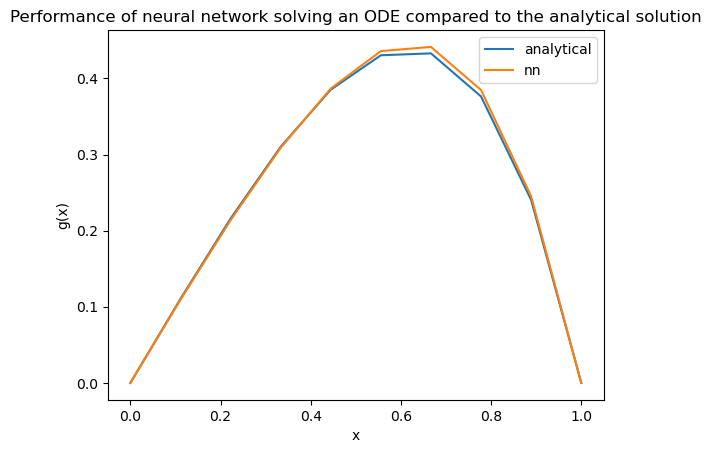

In [ ]:
# Plot the results

plt.title('Performance of neural network solving an ODE compared to the analytical solution')
plt.plot(x, res_analytical)
plt.plot(x, res[0,:])
plt.legend(['analytical','nn'])
plt.xlabel('x')
plt.ylabel('g(x)')
plt.show()